In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Exploration

In [2]:
concrete = pd.read_csv('concrete.csv')
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


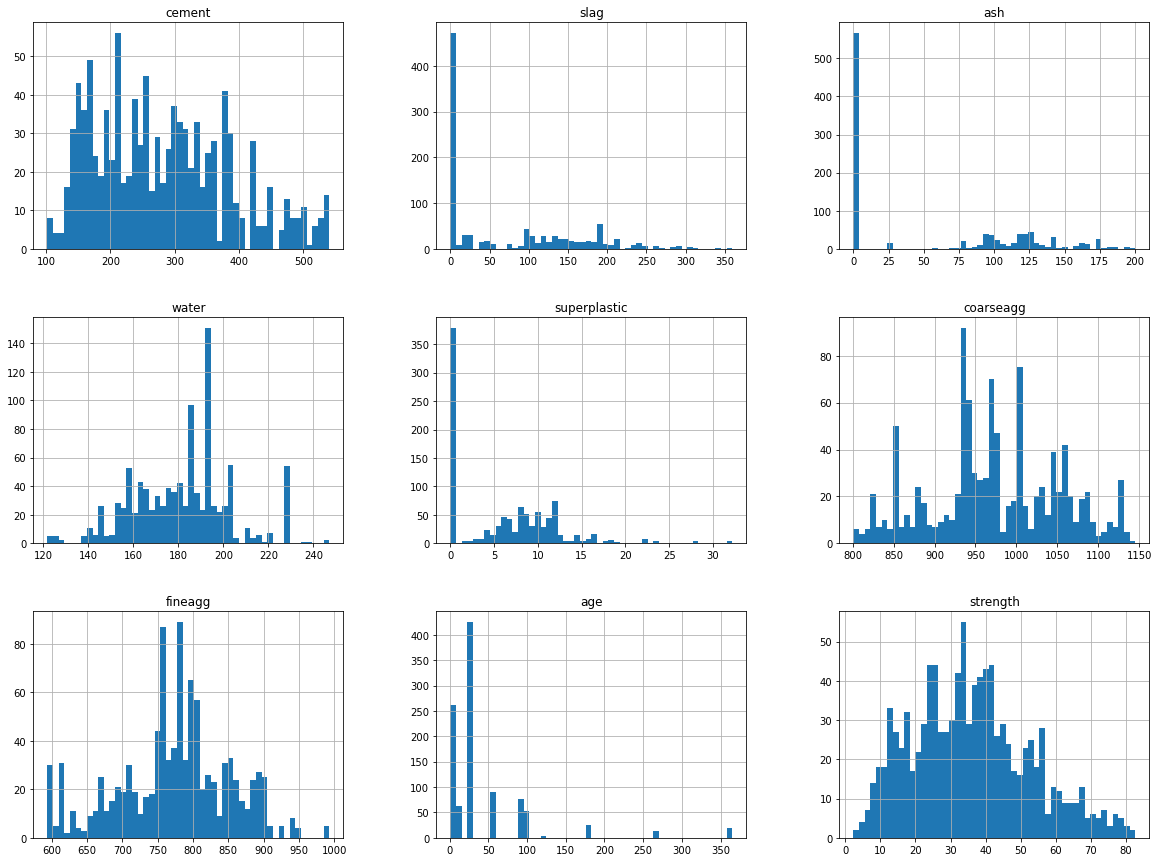

In [5]:
concrete.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
concrete['age'].value_counts()

28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='strength'>

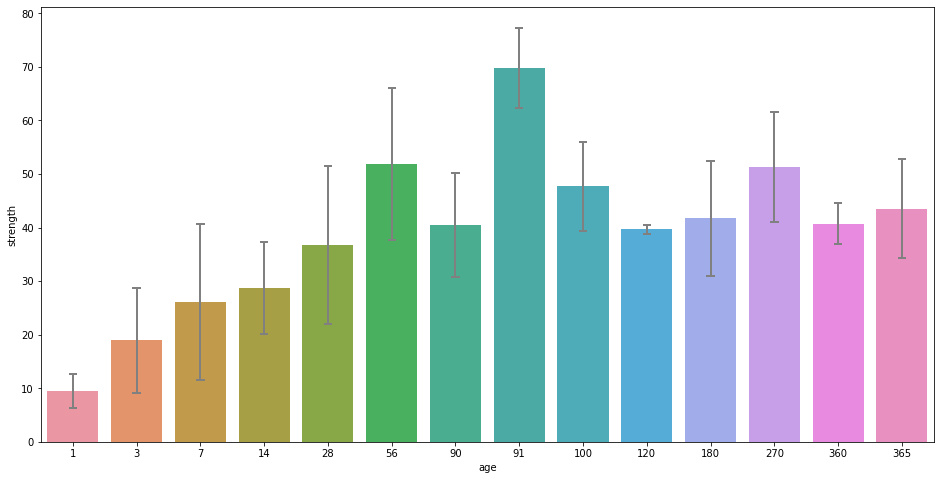

In [7]:
plt.figure(figsize=(16,8))
sns.barplot(x='age', y='strength', data=concrete, capsize=0.1,errcolor='gray', errwidth=2, ci='sd')

<AxesSubplot:xlabel='age', ylabel='strength'>

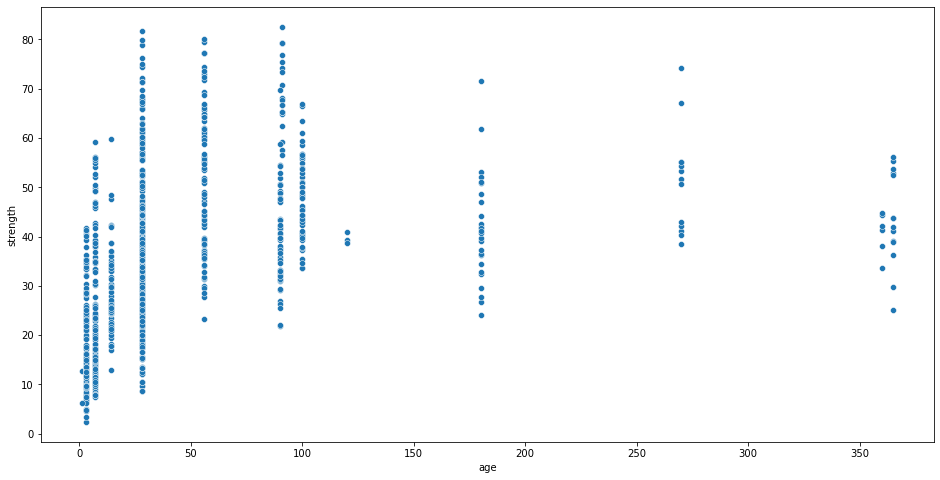

In [8]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='age', y='strength', data=concrete)

<AxesSubplot:>

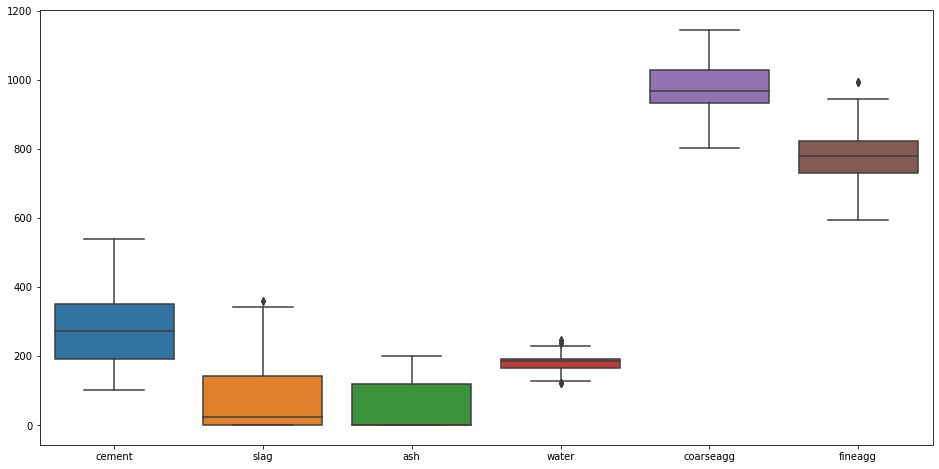

In [9]:
plt.figure(figsize=(16,8))
sns.boxplot(data= concrete[['cement', 'slag', 'ash', 'water', 'coarseagg', 'fineagg']])

In [10]:
concrete = concrete.copy()

In [11]:
concrete['CEM III'] = concrete['cement'] + concrete['slag']
concrete

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,CEM III
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,353.3
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,211.1
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,250.0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,380.0
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,338.2
...,...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29,135.0
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30,531.3
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,392.4
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06,380.0


In [12]:
# Equivalent w/z
concrete['(w/z)eq'] = concrete['water'] / ( concrete['CEM III'] + 0.4 * concrete['ash'] )
concrete

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,CEM III,(w/z)eq
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,353.3,0.575998
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,211.1,0.606932
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,250.0,0.650062
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,380.0,0.600000
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,338.2,0.571555
...,...,...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29,135.0,0.893744
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30,531.3,0.266893
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,392.4,0.419117
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06,380.0,0.600000


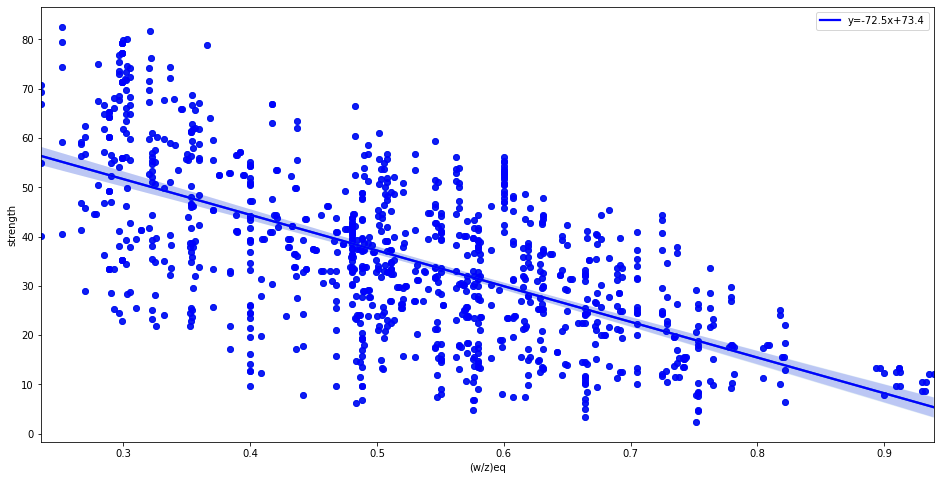

In [13]:
from scipy import stats

plt.figure(figsize=(16,8))
sns.regplot(x='(w/z)eq', y='strength', data=concrete)

slope, intercept, r_value, p_value, std_err = stats.linregress(concrete['(w/z)eq'],concrete['strength'])


ax = sns.regplot(x='(w/z)eq', y='strength', data=concrete, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

<ipython-input-14-c8bfa1afd80d>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(concrete.corr(), dtype=np.bool))


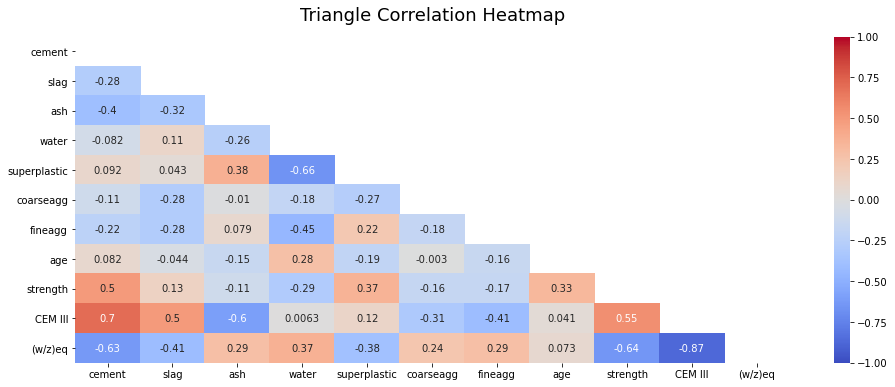

In [14]:
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(concrete.corr(), dtype=np.bool))
heatmap = sns.heatmap(concrete.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

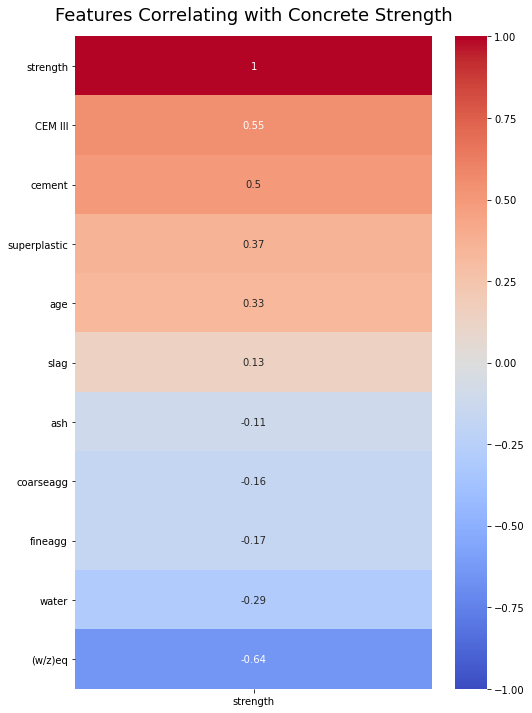

In [15]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(concrete.corr()[['strength']].sort_values(by='strength', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Features Correlating with Concrete Strength', fontdict={'fontsize':18}, pad=16);

Stratify Data (train data should have similar feature distribution than original data)

In [16]:
# for the model training, the same age distribution should be applied than in the original model
concrete["age_cat"] = pd.cut(concrete["age"],
                               bins=[0., 7.0, 14.0, 28.0, 56.0, 91.0, 180, np.inf],
                               labels=[7, 14, 28, 56, 91, 180, 365])
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,CEM III,(w/z)eq,age_cat
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,353.3,0.575998,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,211.1,0.606932,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,250.0,0.650062,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,380.0,0.600000,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,338.2,0.571555,28


<AxesSubplot:>

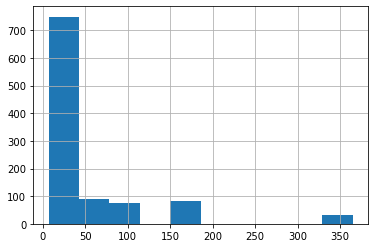

In [17]:
concrete['age_cat'].hist()

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

In [19]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [20]:
for train_index, test_index in split.split(concrete, concrete["age_cat"]):
    strat_train_set = concrete.loc[train_index]
    strat_test_set = concrete.loc[test_index]

In [21]:
strat_train_set["age_cat"].value_counts() / len(strat_train_set)

28     0.412621
7      0.253641
56     0.088592
180    0.078883
91     0.074029
14     0.060680
365    0.031553
Name: age_cat, dtype: float64

In [22]:
concrete['age_cat'].value_counts()/len(concrete['age'])

28     0.412621
7      0.254369
56     0.088350
180    0.078641
91     0.073786
14     0.060194
365    0.032039
Name: age_cat, dtype: float64

Train, Test, Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_set, test_set = train_test_split(concrete, test_size=0.2, random_state=42)

In [25]:
len(train_set)

824

In [26]:
len(test_set)

206

In [27]:
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,CEM III,(w/z)eq,age_cat
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,353.3,0.575998,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,211.1,0.606932,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,250.0,0.650062,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,380.0,0.600000,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,338.2,0.571555,28


In [28]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("age_cat", axis=1, inplace=True)

In [29]:
concrete = strat_train_set.copy()

Seperate attributes from labels

In [30]:
concrete = strat_train_set.drop("strength", axis=1)
concrete_labels = strat_train_set["strength"].copy()

In [31]:
concrete_labels.head()

568    13.12
566    26.14
462    39.23
732    79.99
436    53.39
Name: strength, dtype: float64

In [32]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824 entries, 568 to 317
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        824 non-null    float64
 1   slag          824 non-null    float64
 2   ash           824 non-null    float64
 3   water         824 non-null    float64
 4   superplastic  824 non-null    float64
 5   coarseagg     824 non-null    float64
 6   fineagg       824 non-null    float64
 7   age           824 non-null    int64  
 8   CEM III       824 non-null    float64
 9   (w/z)eq       824 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 70.8 KB


Imputing missing values --> not necessary in this case

One-Hot-Encoding of categorical values --> no categorical values in dataset

In [33]:
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,CEM III,(w/z)eq
568,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,3,251.4,0.631026
566,144.0,136.0,106.0,178.0,7.0,941.0,774.0,28,280.0,0.552109
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,210.1,0.441913
732,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,540.0,0.300000
436,446.0,24.0,79.0,162.0,10.3,967.0,712.0,28,470.0,0.322967


Adding and combine cutomized attributes to model by fitting and transforming those attributes with customized CombineAttributeAdder Class

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin

In [35]:
concrete.values[0]

array([2.5140000e+02, 0.0000000e+00, 1.1830000e+02, 1.8850000e+02,
       6.4000000e+00, 1.0284000e+03, 7.5770000e+02, 3.0000000e+00,
       2.5140000e+02, 6.3102571e-01])

In [44]:
# consider superplasticizer amount in (w/z)eq as another attribute
ash_ix, water_ix, superplastic_ix, CEMIII_ix = 2, 3, 4, 8 #num are col position in concrete df 


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_factor=True): # no *args or **kargs
        self.add_factor = add_factor
        
    def fit(self, X, y=None):
        return self # nothing else to do
    
    def transform(self, X, y=None):
        wz_eq = ( X[:, water_ix] + X[:, superplastic_ix] ) / ( X[:, CEMIII_ix] + 0.4 * X[:, ash_ix])
        
        if self.add_factor is True:
            return np.c_[X, wz_eq * self.add_factor]
        else:
            return np.c_[X, wz_eq]
        
attr_adder = CombinedAttributesAdder(add_factor=False)
concrete_extra_attribs = attr_adder.transform(concrete.values)
concrete_extra_attribs[0]

array([2.51400000e+02, 0.00000000e+00, 1.18300000e+02, 1.88500000e+02,
       6.40000000e+00, 1.02840000e+03, 7.57700000e+02, 3.00000000e+00,
       2.51400000e+02, 6.31025710e-01, 6.52450455e-01])

Create pipeline for numerical and/or categorical values (e.g. in this case no impute, just add attributes and scale data (either min/max scaler or standard dev scaler to lower outlier impact)

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [62]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler())])

In [63]:
concrete_tr = num_pipeline.fit_transform(concrete)
concrete_tr[0]

array([-0.25984465, -0.87431626,  1.02572617,  0.30277946,  0.04057278,
        0.70501606, -0.1894303 , -0.67609511, -0.90734446,  0.75498946,
        0.78583096])

In [65]:
#this step is not necessary, however this pipeline comes in handy if you
#have to deal with numerical and categorical values
num_attribs = list(concrete)
#cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs)
    ])
concrete_prepared = full_pipeline.fit_transform(concrete)
concrete_prepared[0]

array([-0.25984465, -0.87431626,  1.02572617,  0.30277946,  0.04057278,
        0.70501606, -0.1894303 , -0.67609511, -0.90734446,  0.75498946,
        0.78583096])

**ML-models**

Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lin_reg = LinearRegression()
lin_reg.fit(concrete_prepared, concrete_labels)

LinearRegression()

In [69]:
some_data = concrete.iloc[:5]
some_data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,CEM III,(w/z)eq
568,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,3,251.4,0.631026
566,144.0,136.0,106.0,178.0,7.0,941.0,774.0,28,280.0,0.552109
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,210.1,0.441913
732,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,540.0,0.300000
436,446.0,24.0,79.0,162.0,10.3,967.0,712.0,28,470.0,0.322967


In [70]:
some_labels = concrete_labels.iloc[:5]
some_labels

568    13.12
566    26.14
462    39.23
732    79.99
436    53.39
Name: strength, dtype: float64

In [71]:
some_data_prepared = full_pipeline.transform(some_data)
some_data_prepared

array([[-0.25984465, -0.87431626,  1.02572617,  0.30277946,  0.04057278,
         0.70501606, -0.1894303 , -0.67609511, -0.90734446,  0.75498946,
         0.78583096],
       [-1.29637007,  0.69453355,  0.83212063, -0.18932105,  0.14076851,
        -0.41700455,  0.01349653, -0.27927594, -0.65470656,  0.21589734,
         0.24854857],
       [-1.06474428, -0.38866496,  1.74190926, -2.82323045, -0.07632223,
         1.09400032,  0.08943847,  0.86356327, -1.27216772, -0.53687287,
        -0.51148541],
       [ 2.52545553, -0.87431626, -0.83634987, -0.9391885 , -0.61069944,
         0.85393413, -1.20655433, -0.27927594,  1.64200164, -1.50630299,
        -1.59087141],
       [ 1.6182545 , -0.59746041,  0.40713286, -0.9391885 ,  0.69184501,
        -0.08322268, -0.75837238, -0.27927594,  1.02365712, -1.34941491,
        -1.32525995]])

In [72]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [25.37903914 29.08755016 46.5095306  51.12630572 52.68734411]


In [73]:
print("Labels:", list(some_labels))

Labels: [13.12, 26.14, 39.23, 79.99, 53.39]


Sqr root error of predicted values

In [74]:
from sklearn.metrics import mean_squared_error

In [77]:
concrete_predictions = lin_reg.predict(concrete_prepared)
lin_mse = mean_squared_error(concrete_labels, concrete_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

10.314981667692688

Decision Tree Regression Model

In [76]:
from sklearn.tree import DecisionTreeRegressor

In [78]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(concrete_prepared, concrete_labels)

DecisionTreeRegressor()

In [79]:
from sklearn.model_selection import cross_val_score

In [80]:
scores = cross_val_score(tree_reg, concrete_prepared, concrete_labels, 
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [81]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [7.42456027 7.25212659 6.49788972 4.42024481 7.00324814 6.18721691
 5.61951689 4.92409283 6.41255676 6.81727084]
Mean: 6.2558723751747625
Standard deviation: 0.9417028293976248


Ensemble Random Forest Regression Model

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
forest_reg = RandomForestRegressor()
forest_reg.fit(concrete_prepared, concrete_labels)

RandomForestRegressor()

In [88]:
concrete_predi = forest_reg.predict(concrete_prepared)
forest_mse = mean_squared_error(concrete_labels, concrete_predi)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.090902218325246

In [89]:
forest_scores = cross_val_score(forest_reg, concrete_prepared, concrete_labels, 
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [90]:
display_scores(forest_rmse_scores)

Scores: [6.14021204 5.64285156 4.84615819 4.20111417 5.11740666 5.18304569
 4.73782403 3.67220595 5.71586451 4.98766718]
Mean: 5.0244349981800775
Standard deviation: 0.6899952339564264


SVM

In [91]:
from sklearn.svm import SVR

In [92]:
sv_reg = SVR(kernel = 'rbf')
sv_reg.fit(concrete_prepared, concrete_labels)

SVR()

In [93]:
concrete_predi = sv_reg.predict(concrete_prepared)
sv_mse = mean_squared_error(concrete_labels, concrete_predi)
sv_rmse = np.sqrt(sv_mse)
sv_rmse

9.544428652366054

In [95]:
sv_scores = cross_val_score(sv_reg, concrete_prepared, concrete_labels, 
                         scoring="neg_mean_squared_error", cv=10)
sv_rmse_scores = np.sqrt(-sv_scores)

In [96]:
display_scores(sv_rmse_scores)

Scores: [10.18193966 10.55105891  9.87227385  9.76795261  9.24903934  9.97144546
 10.49293351  9.96622584 10.30945255 10.26549787]
Mean: 10.06278195837328
Standard deviation: 0.3664210144543127


In [98]:
sv_reg1 = SVR(kernel = 'linear')
sv_reg1.fit(concrete_prepared, concrete_labels)

SVR(kernel='linear')

In [99]:
concrete_predi = sv_reg1.predict(concrete_prepared)
sv_mse1 = mean_squared_error(concrete_labels, concrete_predi)
sv_rmse1 = np.sqrt(sv_mse1)
sv_rmse1

10.565117373714948

In [101]:
sv_scores1 = cross_val_score(sv_reg1, concrete_prepared, concrete_labels, 
                         scoring="neg_mean_squared_error", cv=10)
sv_rmse_scores1 = np.sqrt(-sv_scores1)

In [102]:
display_scores(sv_rmse_scores1)

Scores: [11.31506107 10.74562441  9.54230053 10.44888725 13.05442156 11.6990056
 10.5434773  10.63086754  9.81614702 10.80062472]
Mean: 10.859641699294873
Standard deviation: 0.9429085748686192


Use Grid Search to find best hyperparameter for model fine tuning

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(concrete_prepared, concrete_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [110]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [111]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10)

In [112]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

7.175148447437142 {'max_features': 2, 'n_estimators': 3}
6.109790432184475 {'max_features': 2, 'n_estimators': 10}
5.834338142147523 {'max_features': 2, 'n_estimators': 30}
6.31953725660444 {'max_features': 4, 'n_estimators': 3}
5.375391727436316 {'max_features': 4, 'n_estimators': 10}
5.253788746003271 {'max_features': 4, 'n_estimators': 30}
5.83093757424461 {'max_features': 6, 'n_estimators': 3}
5.433015181240443 {'max_features': 6, 'n_estimators': 10}
5.200688478882558 {'max_features': 6, 'n_estimators': 30}
5.939498901795045 {'max_features': 8, 'n_estimators': 3}
5.48725144961753 {'max_features': 8, 'n_estimators': 10}
5.1925994022147215 {'max_features': 8, 'n_estimators': 30}
7.108646187648606 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
5.88978886475153 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
6.553960625267446 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
5.460241976772046 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
5

In [113]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.06242473, 0.01775595, 0.00976051, 0.05157361, 0.01816792,
       0.0197005 , 0.01758221, 0.35504269, 0.04780825, 0.2686368 ,
       0.13154683])

In [114]:
extra_attribs = ["(w/z)eq with PCE"]
#cat_encoder = full_pipeline.named_transformers_["num"]
#cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3550426889696852, 'age'),
 (0.2686367973694965, '(w/z)eq'),
 (0.13154683404973327, '(w/z)eq with PCE'),
 (0.062424732155316784, 'cement'),
 (0.05157360976931409, 'water'),
 (0.04780824764369211, 'CEM III'),
 (0.019700499468539596, 'coarseagg'),
 (0.018167922440064634, 'superplastic'),
 (0.017755949206356435, 'slag'),
 (0.017582212651953574, 'fineagg'),
 (0.009760506275847774, 'ash')]

Finally: Test model on test set with grid search best hyperparameter estimator

In [116]:
strat_test_set.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,CEM III,(w/z)eq
775,275.0,0.0,0.0,183.0,0.0,1088.0,808.0,28,24.50,275.0,0.665455
778,314.0,0.0,113.0,170.0,10.0,925.0,783.0,28,38.46,314.0,0.473274
592,238.1,0.0,0.0,185.7,0.0,1118.8,789.3,7,10.34,238.1,0.779924
247,213.7,0.0,174.7,154.8,10.2,1053.5,776.4,28,40.15,213.7,0.545878
513,164.0,0.0,200.0,181.0,13.0,849.0,846.0,28,15.09,164.0,0.741803


In [117]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("strength", axis=1)
y_test = strat_test_set["strength"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [118]:
final_rmse

4.765899206115599

In [119]:
from scipy import stats

In [120]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))

array([3.8744188 , 5.51511282])